One dimensional harmonic oscillator using leapfrog integration, different values of K

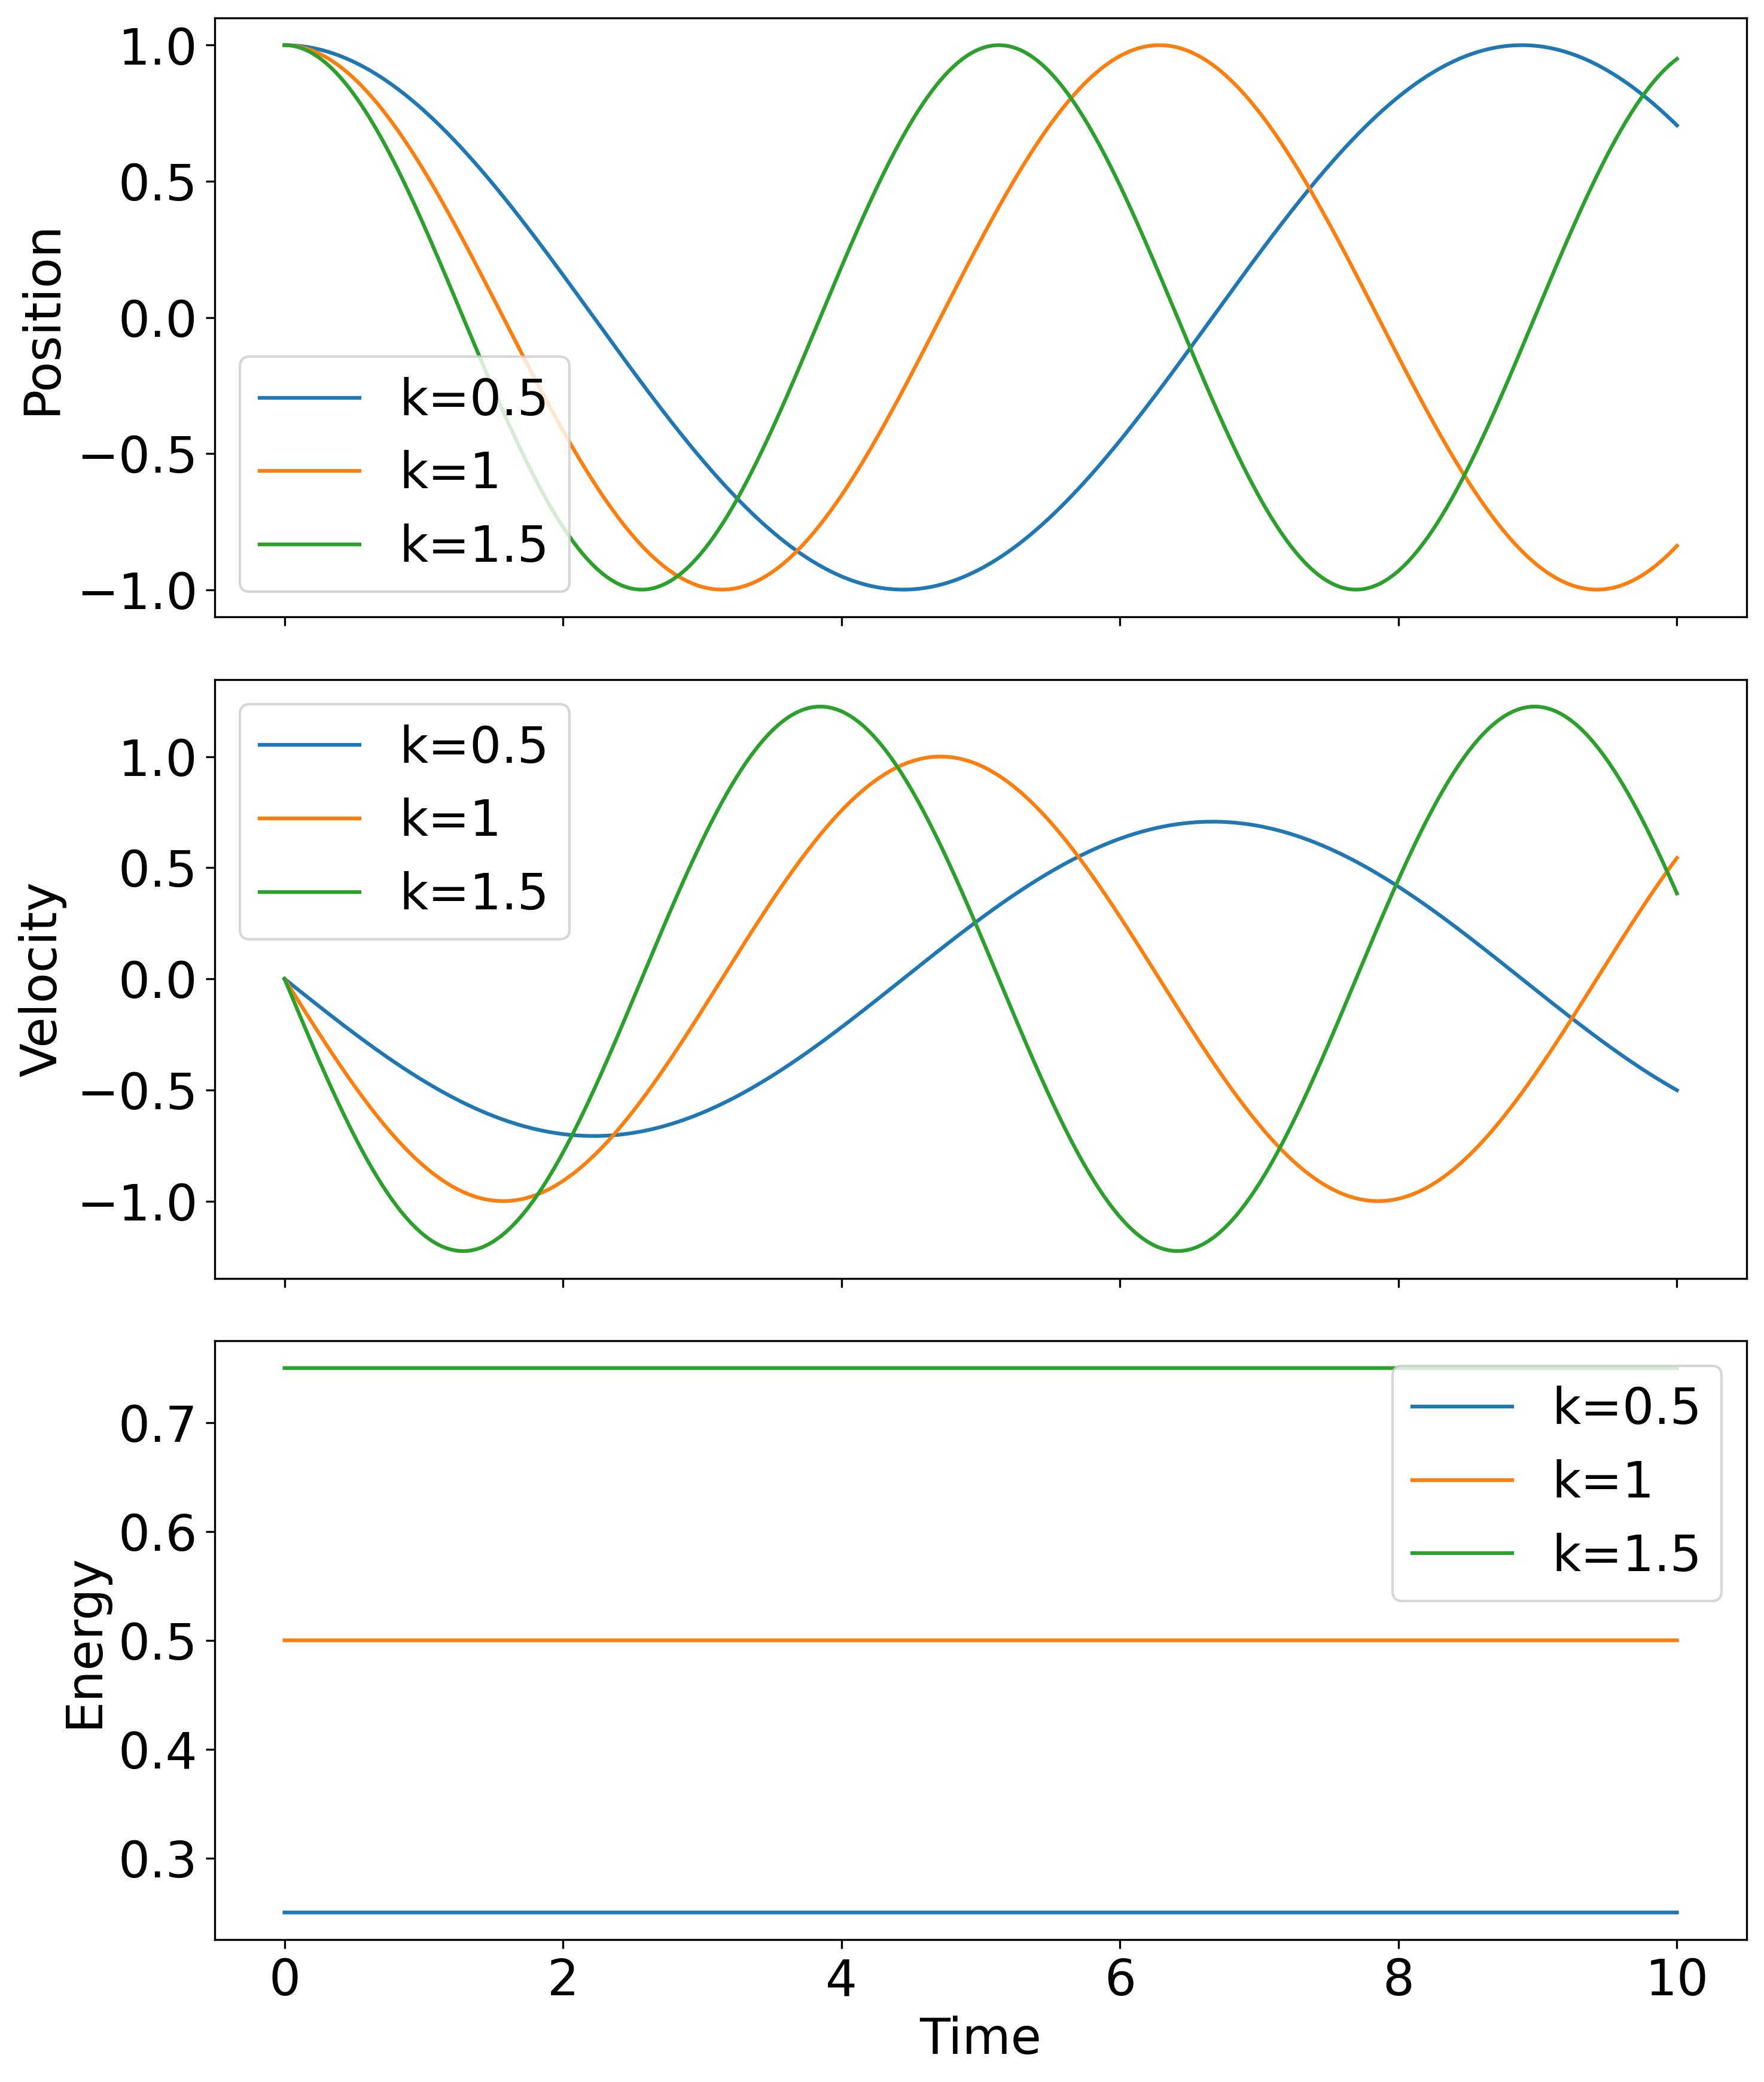

In [1]:
from src.optional.leapfrog import oscillateLeap
import numpy as np

N = 10000
T = 10
k_values = [0.5, 1, 1.5]

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

fig, axs = plt.subplots(3, 1, figsize=(10, 12), dpi= 300, sharex=True)

for idx, k in enumerate(k_values):
    position, velocity, energy = oscillateLeap(N, T, k=k)
    
    t = np.linspace(0, T, int(N))
    
    axs[0].plot(t, position, label=f'k={k}')
    axs[0].set_ylabel('Position')
    axs[0].legend()

    axs[1].plot(t, velocity, label=f'k={k}')
    axs[1].set_ylabel('Velocity')
    axs[1].legend()

    axs[2].plot(t, energy, label=f'k={k}')
    axs[2].set_ylabel('Energy')
    axs[2].set_xlabel('Time')
    axs[2].legend()

plt.tight_layout()
plt.show()

Comparing RK45 (non-symplectic) with leapfrog (symplectic)

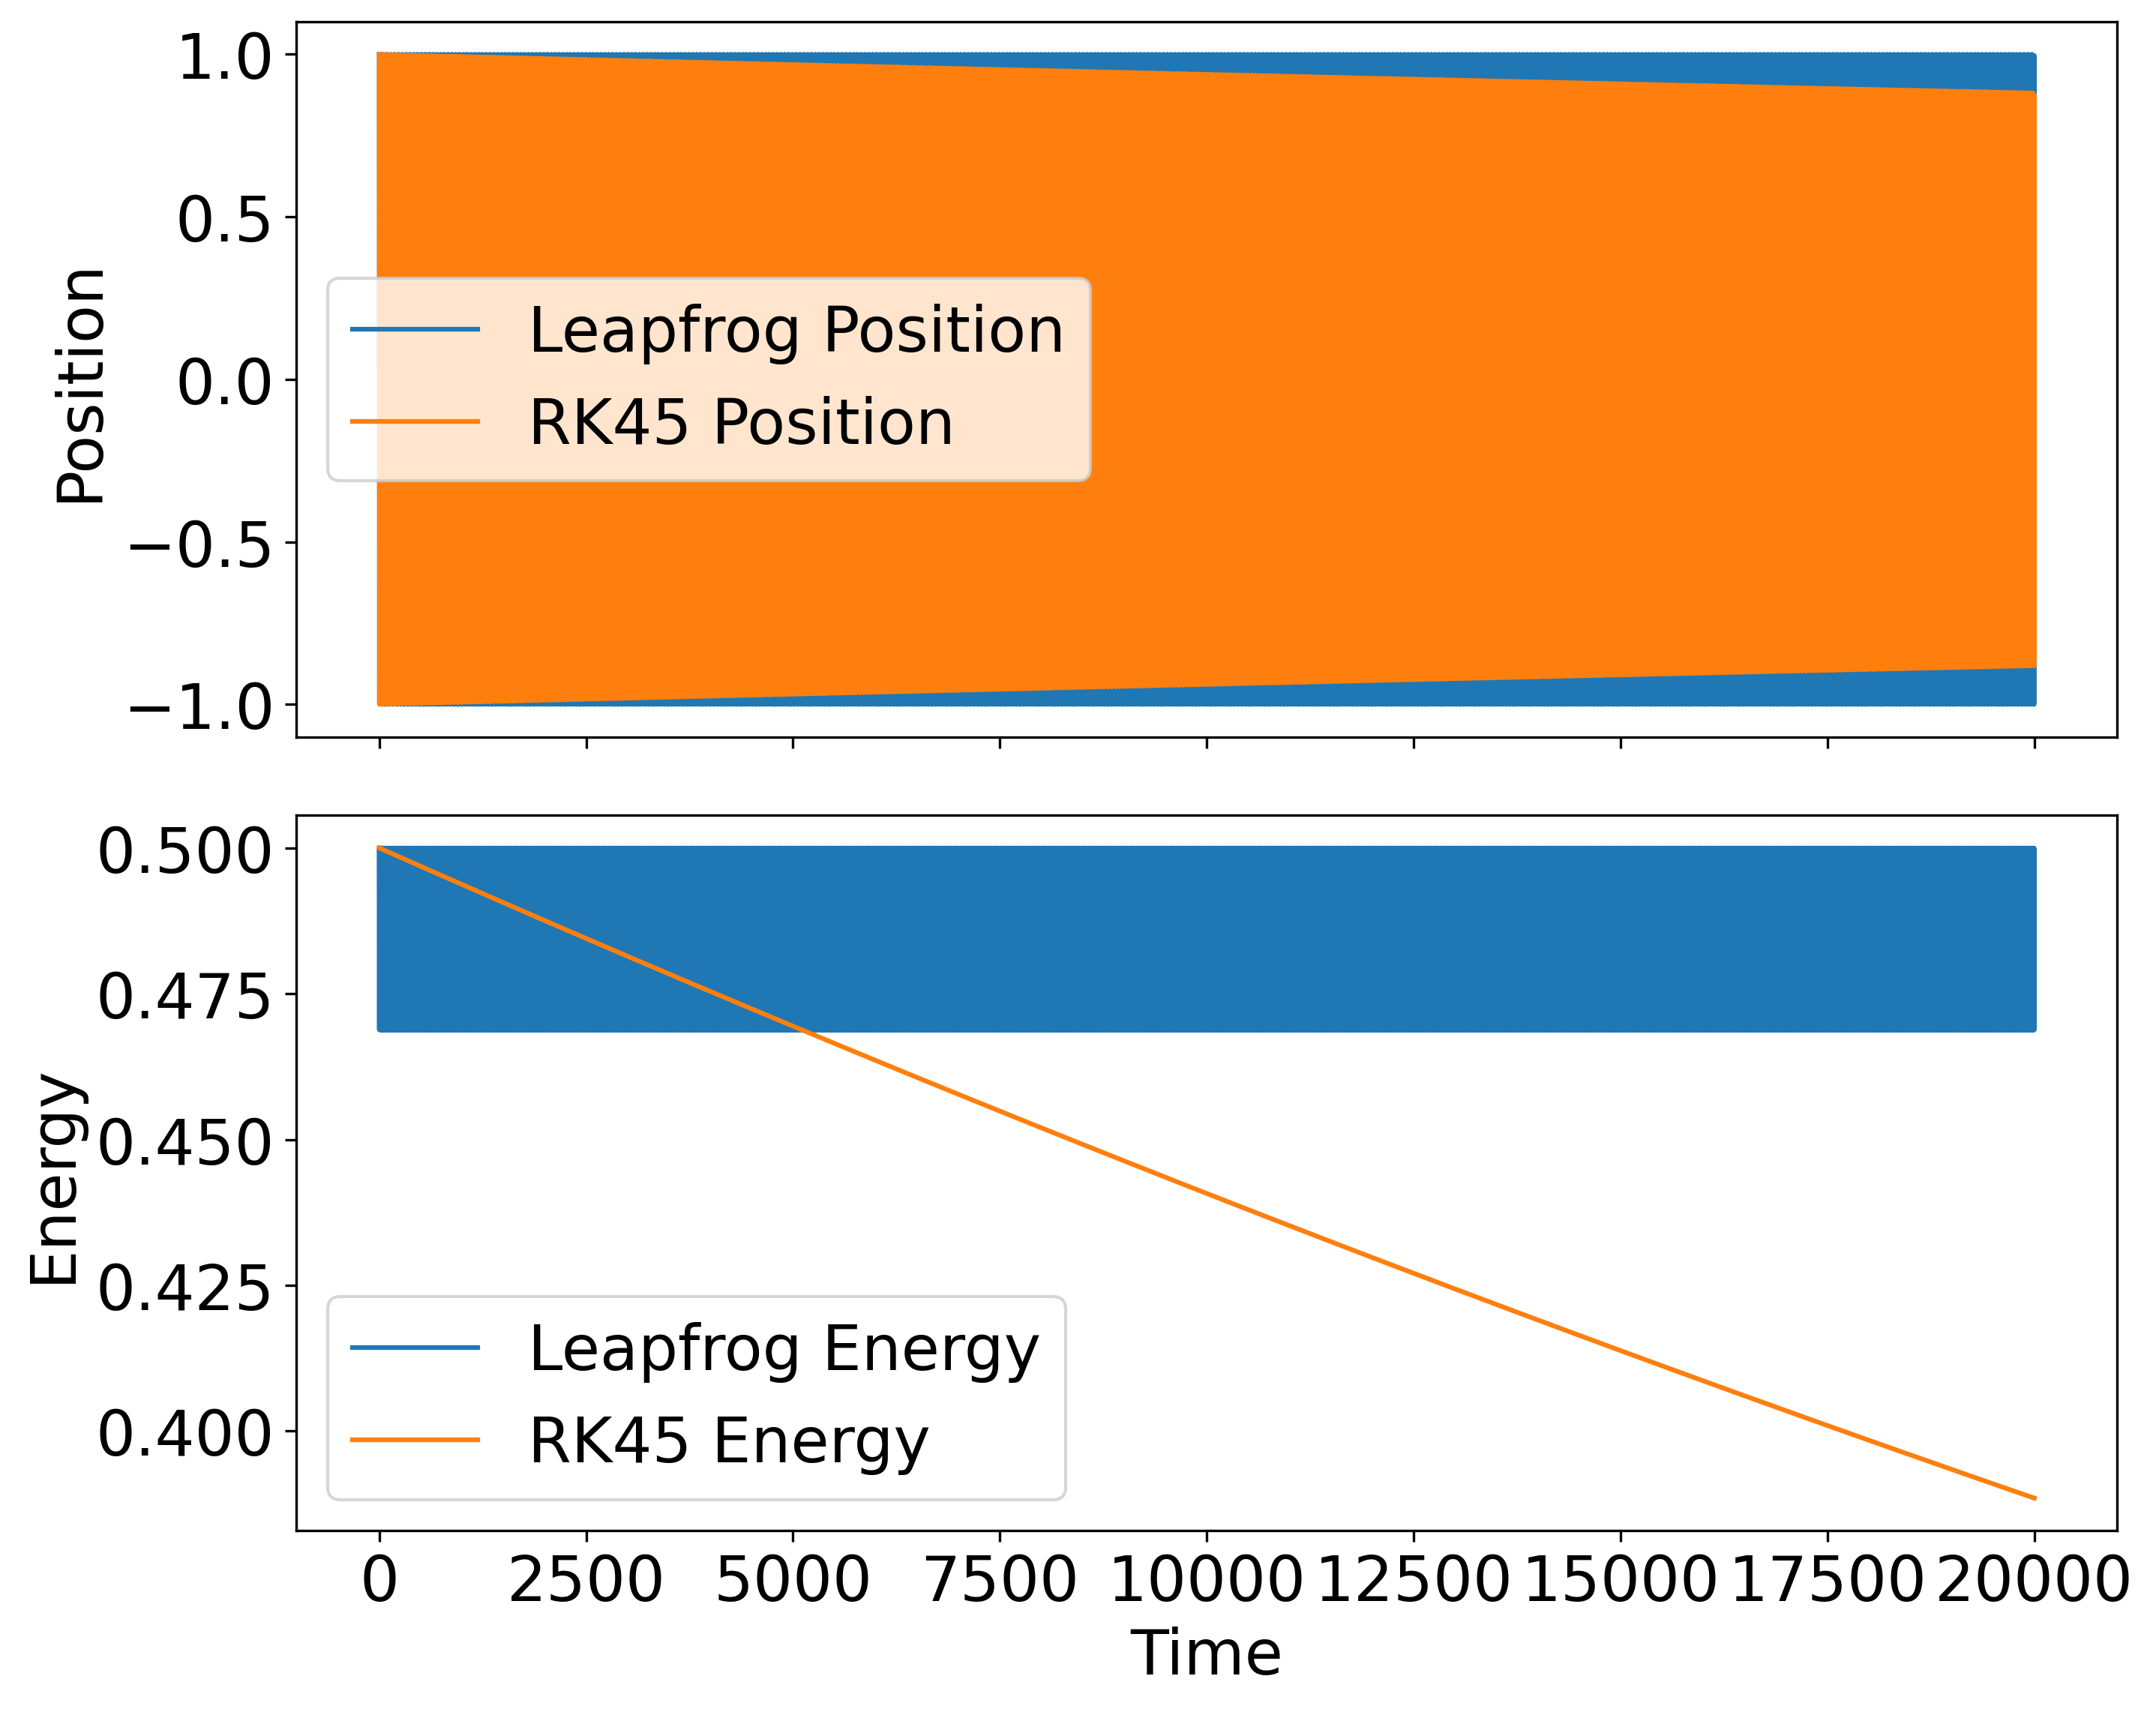

In [3]:
from src.optional.leapfrog import oscillateRK45

N = 40000
T = 20000
k = 1  # Choose one value of k

# Plotting for leapfrog method
position_leap, velocity_leap, energy_leap = oscillateLeap(N, T, k=k)
t = np.linspace(0, T, int(N))

plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(2, 1, figsize=(10, 8), dpi=300, sharex=True)

axs[0].plot(t, position_leap, label='Leapfrog Position')
axs[0].set_ylabel('Position')
axs[0].legend()

axs[1].plot(t, energy_leap, label='Leapfrog Energy')
axs[1].set_ylabel('Energy')
axs[1].set_xlabel('Time')
axs[1].legend()

# Plotting for RK45 method
t_rk45, position_rk45, velocity_rk45, energy_rk45 = oscillateRK45(N, T, k=k)

axs[0].plot(t_rk45, position_rk45, label='RK45 Position')
axs[0].legend()

axs[1].plot(t_rk45, energy_rk45, label='RK45 Energy')
axs[1].legend()

plt.tight_layout()
plt.show()


Time-dependent sinusoidal driving force

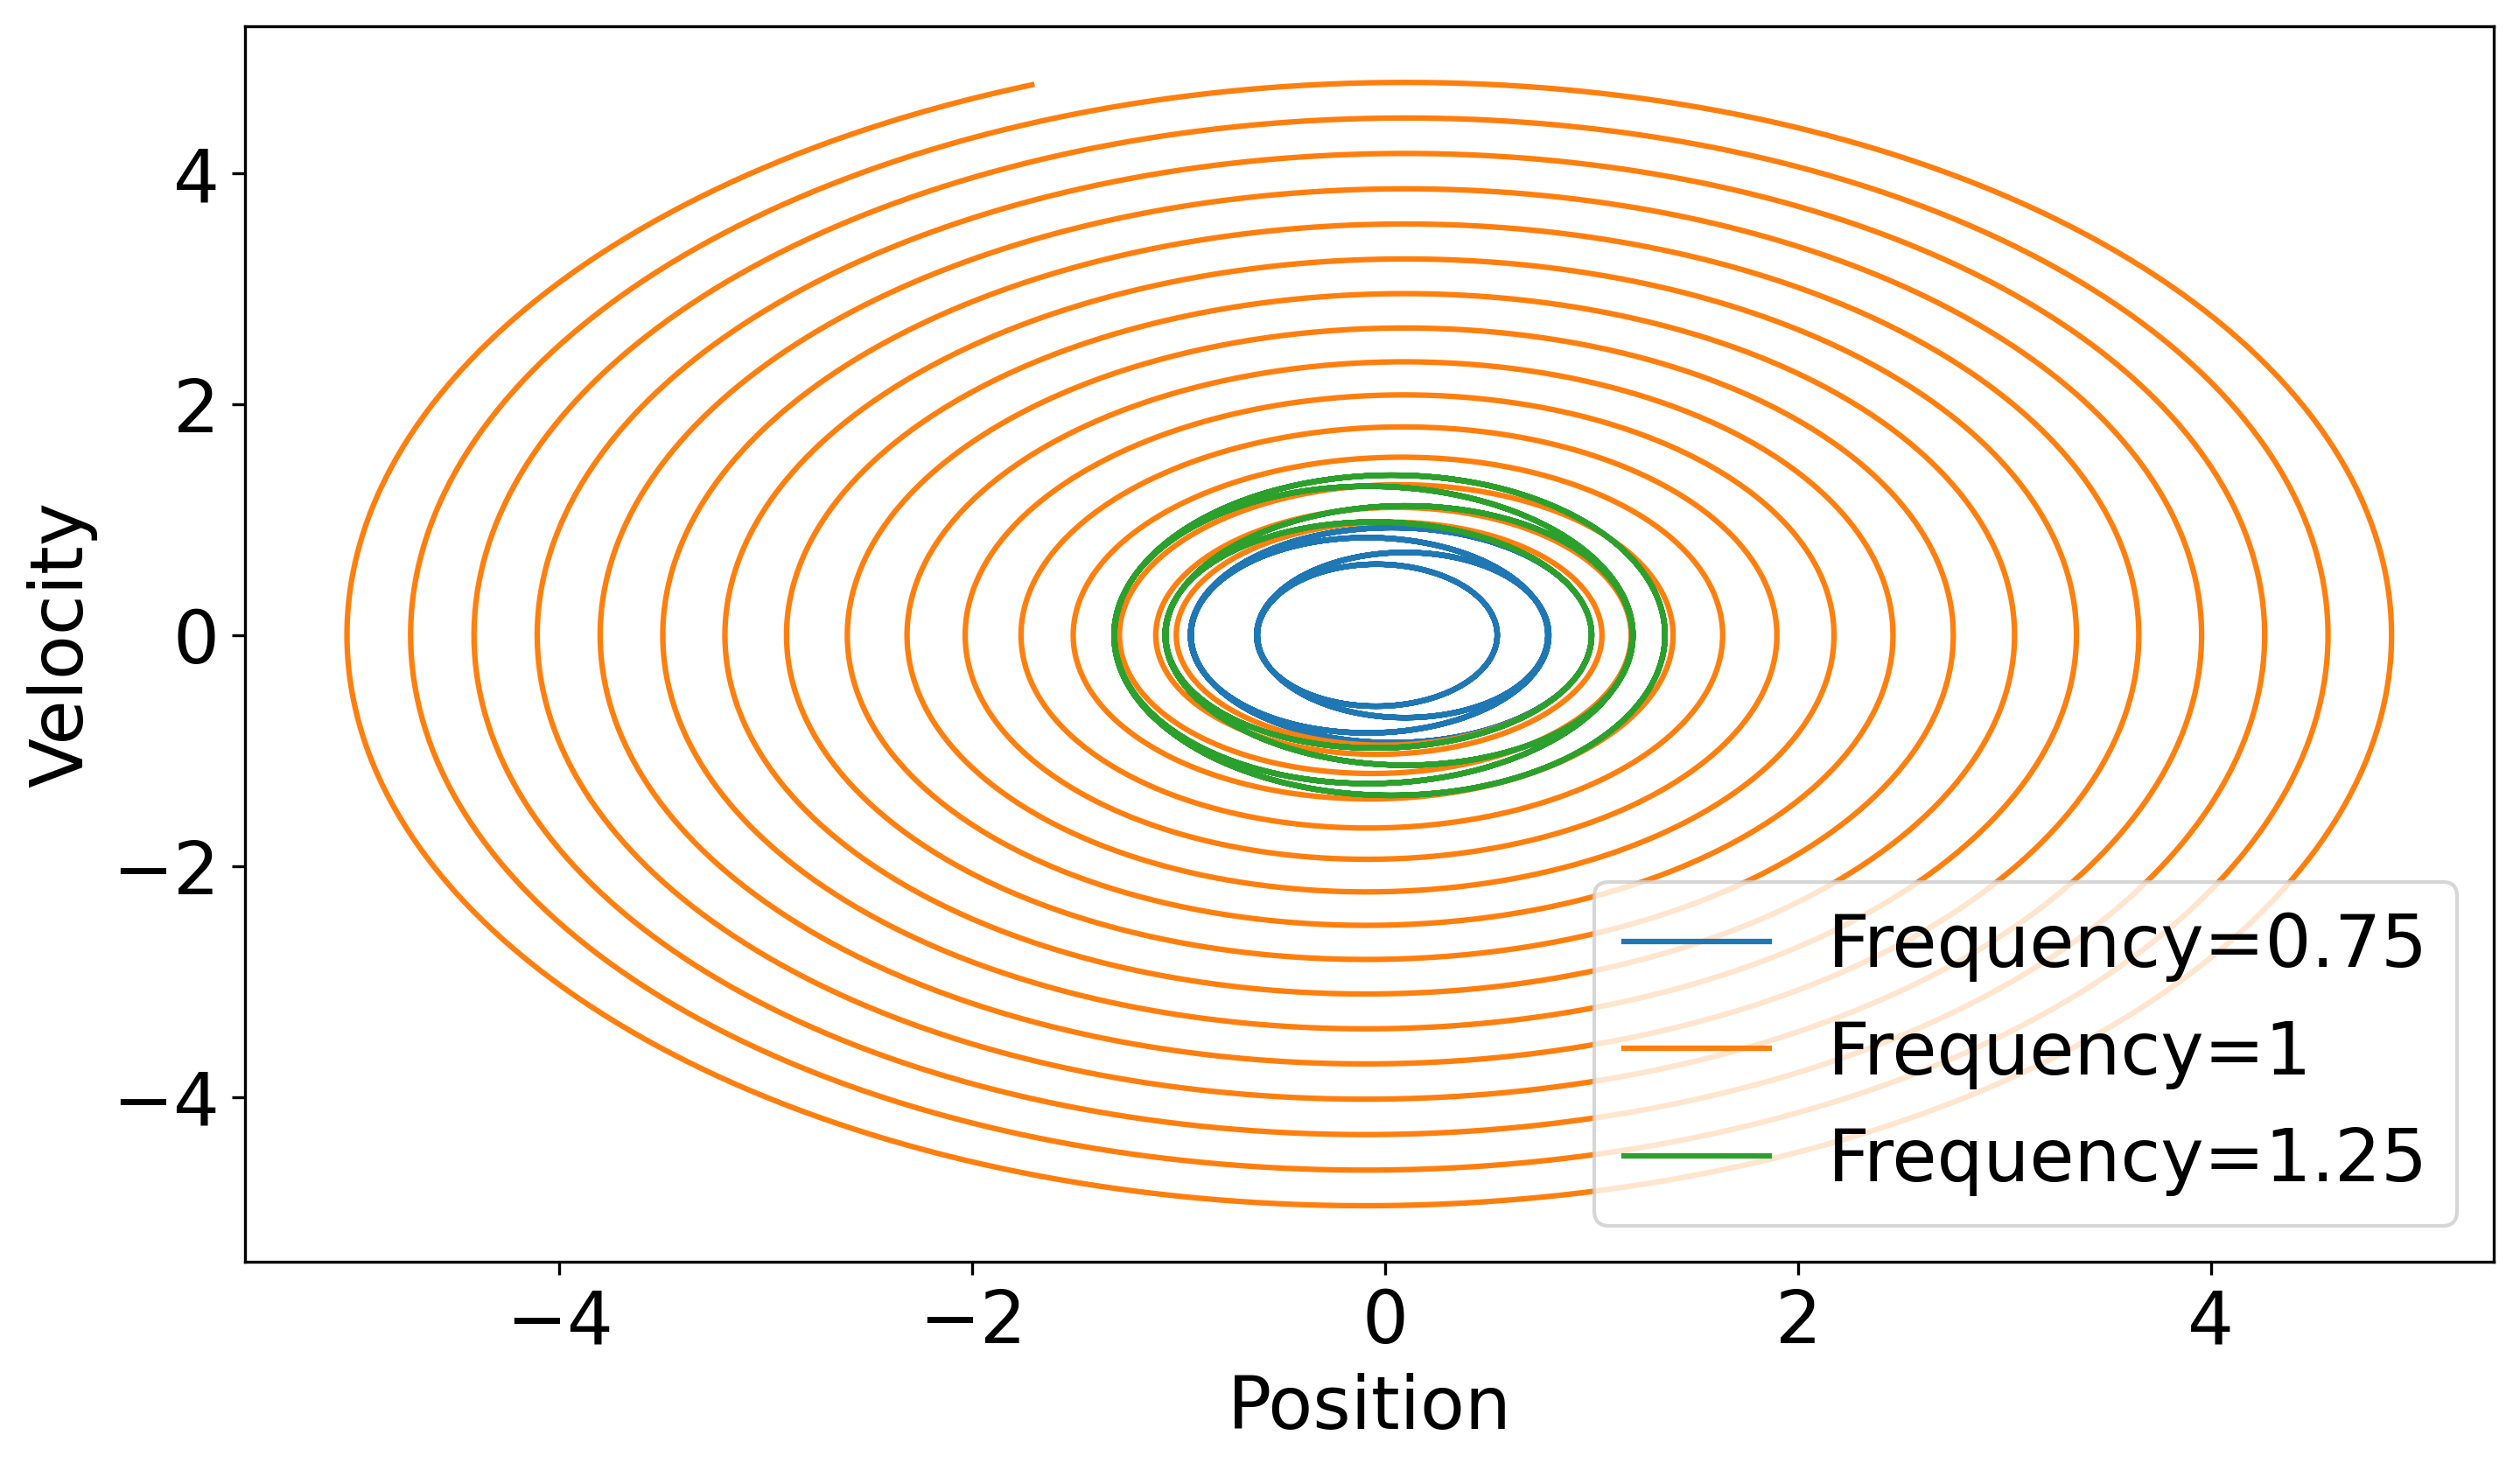

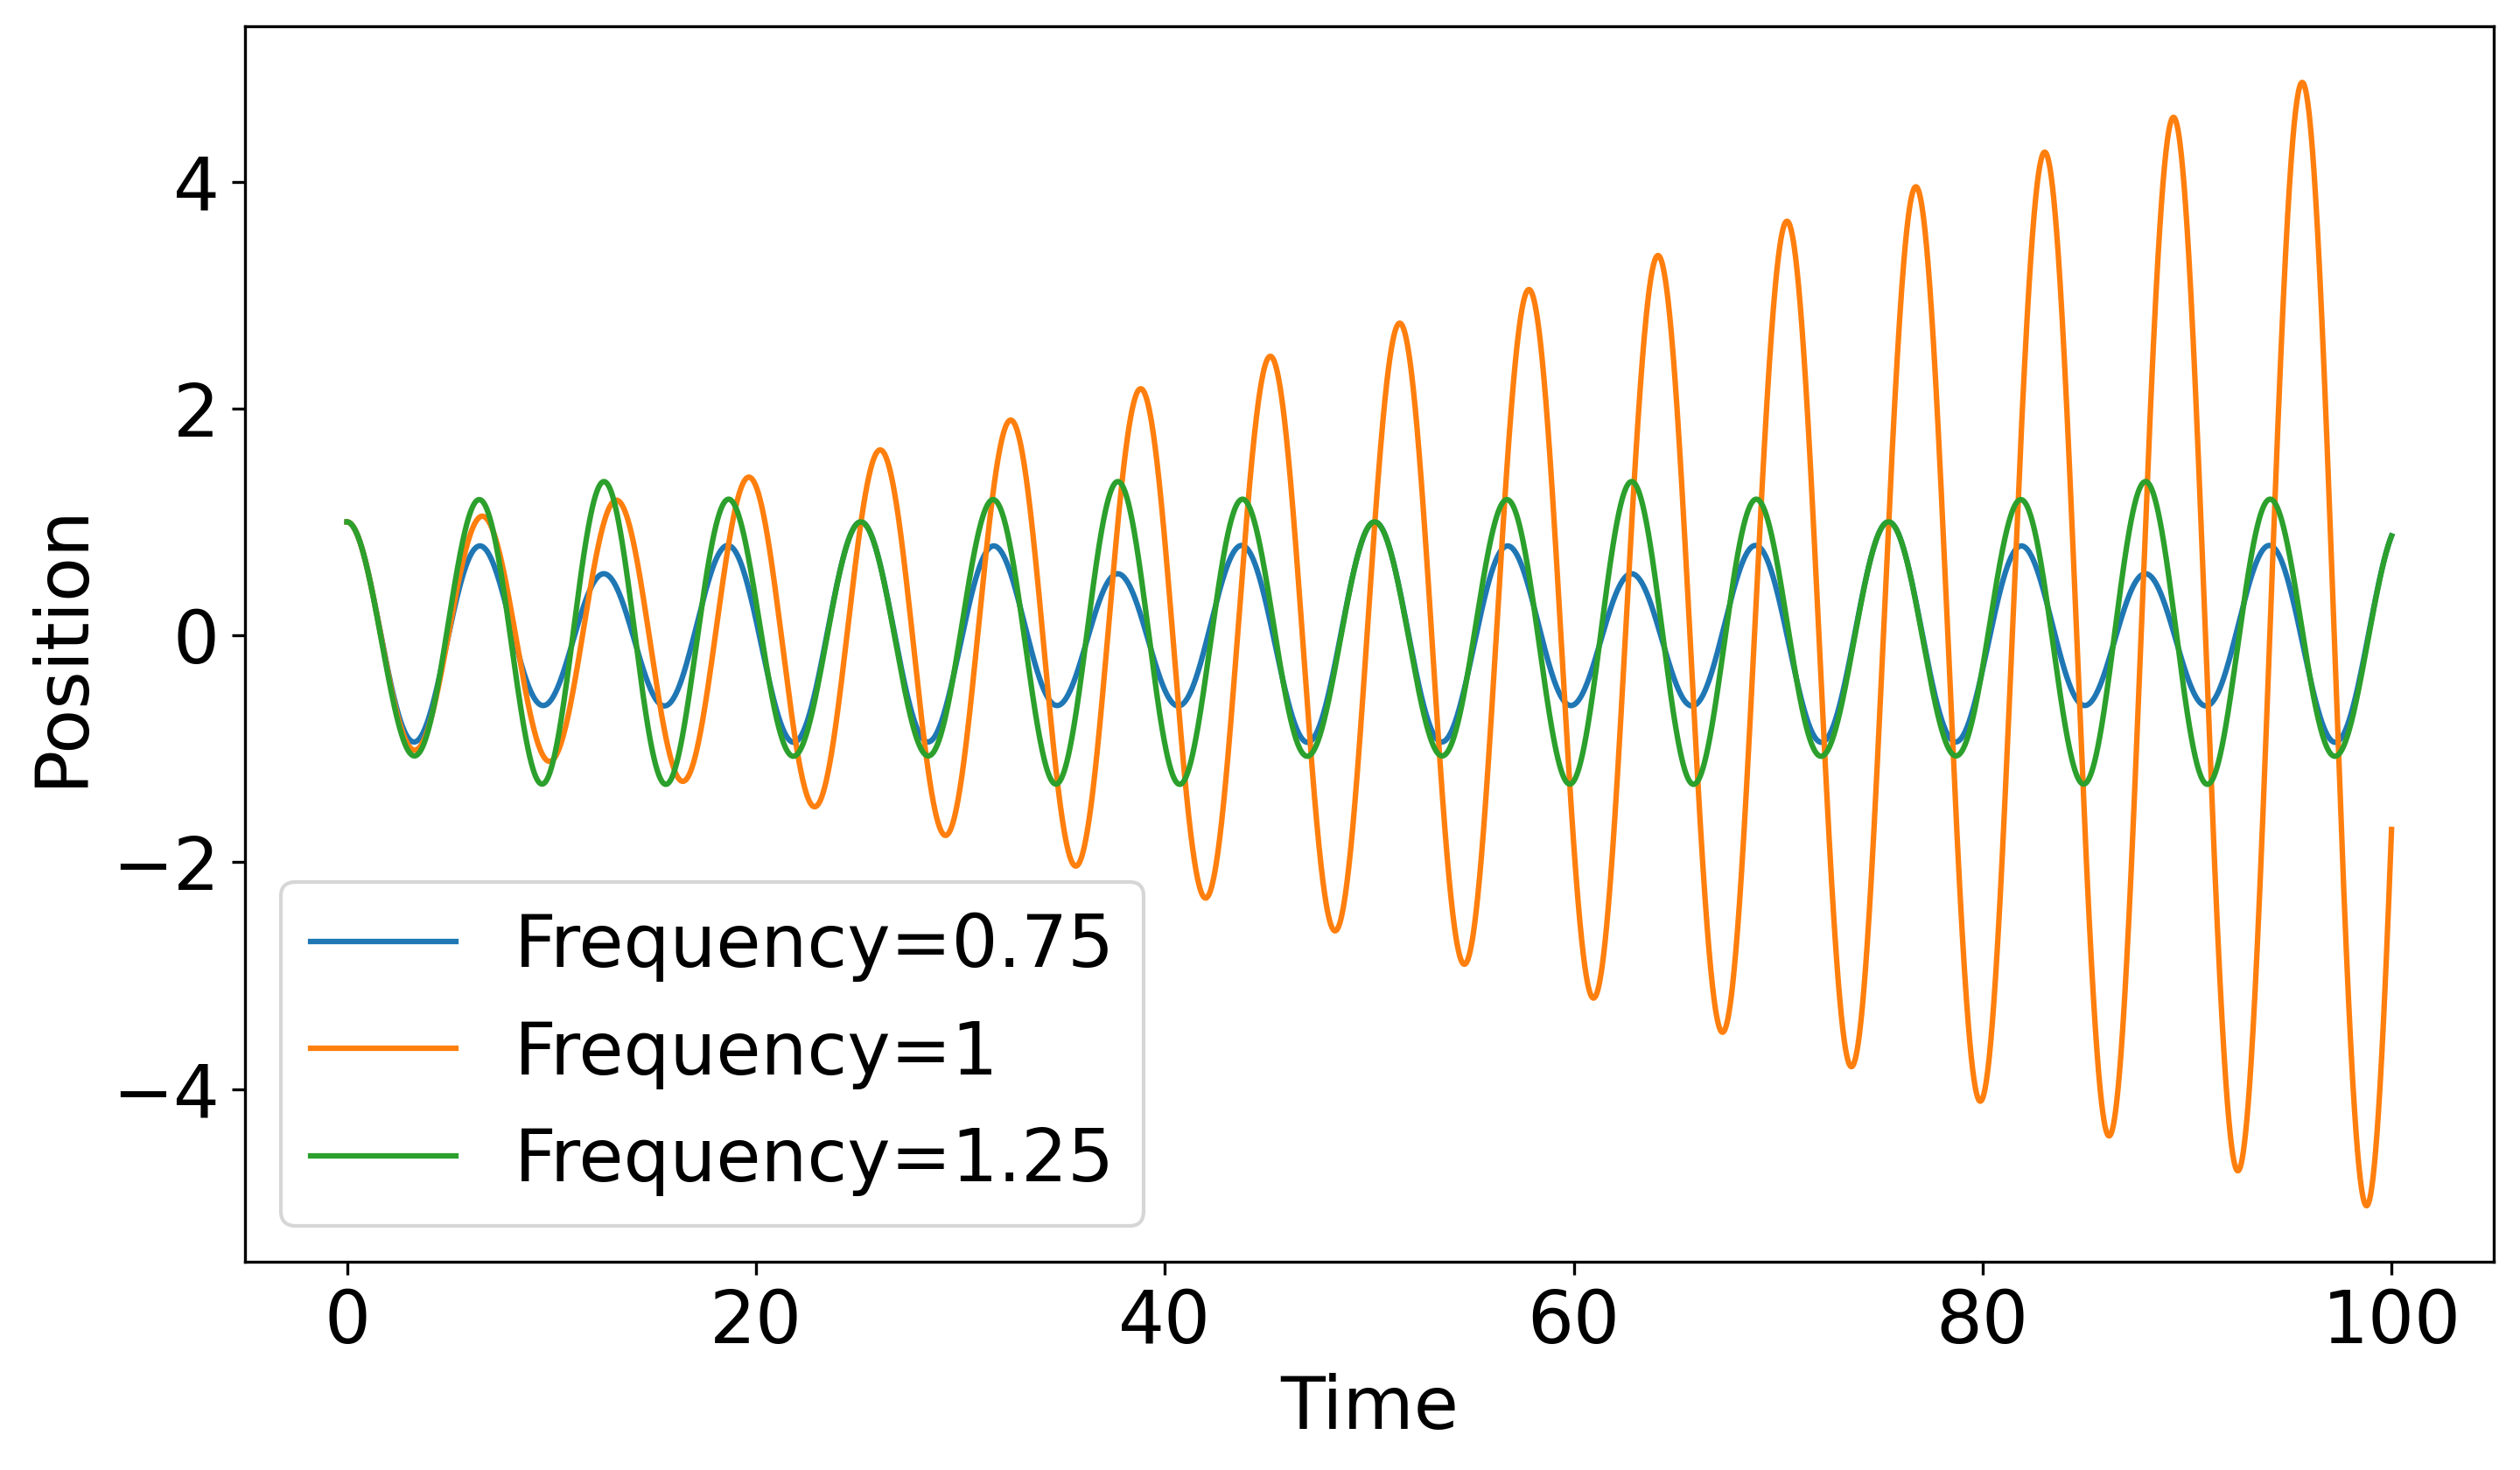

In [5]:
from src.optional.leapfrog import oscillateForcedLeap

N = 10000
T = 100
strength = 0.1
frequencies = [0.75, 1, 1.25]

# Set DPI and font sizes
plt.rcParams.update({'font.size': 20})

# Phase plot
fig1, ax1 = plt.subplots(figsize=(10, 6), dpi=300)
for frequency in frequencies:
    position_leap, velocity_leap, energy_leap = oscillateForcedLeap(N, T, strength, frequency, k=k)
    ax1.plot(position_leap, velocity_leap, label=f'Frequency={frequency}')
ax1.set_xlabel('Position')
ax1.set_ylabel('Velocity')
ax1.legend()
plt.tight_layout()
plt.show()

# Position plot
fig2, ax2 = plt.subplots(figsize=(10, 6), dpi=300)
t = np.linspace(0, T, int(N))
for frequency in frequencies:
    position_leap, velocity_leap, energy_leap = oscillateForcedLeap(N, T, strength, frequency, k=k)
    ax2.plot(t, position_leap, label=f'Frequency={frequency}')
ax2.set_xlabel('Time')
ax2.set_ylabel('Position')
ax2.legend()
plt.tight_layout()
plt.show()
